## Biota Skills Evaluation - Staff Reservoir Engineer / Staff Geologist

The goal of this notebook is to assess several sets of skills that are required for Staff Reservoir Engineer & Staff Geologist roles at Biota.

Instructions:
* Each section contains its own set of questions which should be answered to the best of your ability
* Completing the Resevoir Engineering / Geology questions are required. Unix and GitHub questions are bonus questions. 
* If the answer to a question is not known to you currently, state that you have not seen that command or usage before. Then search the internet for the answer and provide it to your best ability.
* If you cannot answer a question, provide a list of your thought processes, and what you tried along the way. This is important for Biota since we often want to accomplish the right thing, but may need help on the execution. This is materially different from not knowing what the most appropriate thing to do is in the first place.

Packages:
* This evaluation should be completable with only the basic packages listed below. If you find yourself needing different packages, please install them and note what and why you are using something specifically.

Execute the cells below to import the relevant packages and functions

In [383]:
%matplotlib inline

In [384]:
# general packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp

## Reservoir Engineering / Geology

### Part 1)

##### 1) What are the main elements of a `petroleum system`? Which element is produced from in conventional vs. unconventional field development?

The main elements of a conventional petroleum system are:
    
* Source rock: potential to generate hydrocarbons within the basin.
* Migration: formations of enough permeability to allow the hydrocarbons from the source beds to the reservoir.
* Reservoir: formation of sufficient areal extent, height and porosity to store volumes of hydrocarbons, as well as enough permeability to allow the hydrocarbons to migrate to the wellbore.
* Trap: configuration of rocks suitable for containing hydrocarbons. Can be either structural, stratigraphical or a combination of the two.
* Seal: impermeable intervals precluding further upward migration.
        
In terms of unconventional plays, some elements of the petroleum system needs to be adjusted:

* Source rocks also act as a reservoir: due to the low permeabilities, most of these unconventional plays are self-sourcing. 
* Little to no migration occurs from the source rock to the reservoir.
* Traps have no effect on the accumulation and migration: unconventional accumulations are extensive and consecutive with no defined boundaries within the source rock. kitchen; traps are generally inconsequential.

In conventional field development, the production comes from the reservoir rock. On the other hand, in unconventional reservoirs, usually the production comes from the self-sourcing rock (source acting as a reservoir). 

##### 2) What are the main `drive mechanisms` of production from conventional and unconventional reservoirs?

As the reservoir pressure declines, we have the following main drive mechanisms of production from conventional reservoirs: 

* Water drive: the aquifer water expands slightly, displacing the oil or gas from the reservoir toward the borehole.
* Gas expansion: the free gas expands to replace produced hydrocarbons.
* Solution gas: there is an expansion of the oil due to the solution gas expanding. Therefore, the oil is moved to the wellbore.
* Rock and liquid expansion:  the withdrawal of liquid or gas from a reservoir results in a decline of the fluid pressure followed by a consequent increase in the grain pressure. Both factors tend to reduce the pore volume and the fluids will be forced out towards the wellbore. 
* Gravity drainage: the oil drains downward through the reservoir under the influence of gravity.

In terms of unconventional, low permeability reservoirs, the main drive mechanisms vary. These accumulations are pervasive throughout a large area and are not generally affected by hydrodynamic influences, being called 'continuous type deposits'. Among the main drive mechanisms for these reservoirs we have the following:

* Shale oil: the tightness of the rock provides impermeable barriers. As the reservoir pressure drops, the exsolution and expansion of the **dissolved gas** in the oil provide the main reservoir drive energy, 
* Shale gas:  a drive mechanism that is associated with certain unconventional gas reservoirs is **gas desorption**. In these cases, there is a high content of organic material in the reservoir rock. This organic rich rock material has the ability to adsorb gas onto its surface. As pressure is depleted, this adsorbed gas is released to the pore-volume of the reservoir by the desorption Process. 
* In general,  the drive mechanisms in unconventional reservoirs are supplemented by additional energy derived from the **expansion of the rock and water**.

##### 3) How does the `In Situ` stress state affect the complexity of resulting hydraulic fracture system? What is the role of pre-existing natural fracturs/faults?

* In-situ stress represents the factor that most influences the fracture propagation.
* The plane along which the fracture is first possible is the one perpendicular to the least principal stress.

It is necessary to create as much contact area between the unconventional gas reservoir and fracture system as possible.

* The success of the hydraulic fracture system depends upon the intersections between induced hydraulic fractures and natural fractures. 
* The interaction between induced hydraulic fractures and the natural fractures by the fracture stimulation provides enhanced permeability in order to increase the hydrocarbon production.
* Therefore, the more pre-existing natural fractures or faults, the more connectivity within the reservoir.

##### 4) Unconventional wells are known for their large decline rates. What are some potential ways of extending the life of an unconventional well?

* Hydraulic fracturing has become a critical component in the successful development of unconventional reservoir and extending the life of an unconventional well. It enables the extraction of natural gas or oil from shale and other forms of tight rock.
* Refracturing restores well productivity to near original or even higher rates of production and extends the productive life of a well.
* There are additional methods for extending the life of an unconventional well, such as wellbore clean-outs, chemical treatments, recompletion, and artificial lift, but not as effective as fracuring the well. 
* To be successful, the companies must understand what type of method is required to meet his specific recovery and business objectives.

##### 5) Write a brief `Technical Roadmap` for integrating DNA Diagnostic with production/pressure data, petro-physical logs and reservoir models?

### Part 2)

##### 1) Create a variable named `WellData` by reading in the well metadata as a `pandas` dataframe from the file `WellData.csv`. Set the index as the `WellName` column. (The well metadata includes average geologic and completions parameters for 115 wells in addition to their 2-year cumulative oil production.)

In [122]:
WellData = pd.read_csv('WellData.csv')
WellData

,WellName,TargetFormation,TargetFormationThickness,BVW,PHIT,PR,SWT,VCL,YM,PGRAD,...,3D_Spacing,LAT_LENGTH,PPG,Prop_ft,Fluid_ft,Avg_Stg_Len,Avg_Clust_Spc,Clusters_per_Stage,Rate_per_cluster,CumOil_24Months
0,Well 1,A,48.099029,2.319936,0.080282,0.080282,0.600788,0.147393,38.672344,0.845430,...,1123.998119,4579,1.236471,390.265123,7.514960,508.777778,508.777778,1,48.780000,85767.71658
1,Well 2,A,47.661448,2.287712,0.079972,0.079972,0.600198,0.145248,38.963685,0.846117,...,1273.997571,4625,1.181445,391.161081,7.883027,513.888889,513.888889,1,49.780000,165623.71340
2,Well 3,B,87.939873,3.380522,0.096938,0.218695,0.396555,0.231885,34.838832,0.837477,...,834.240524,4036,0.709314,1434.960357,48.167245,168.166667,33.633333,5,17.580833,194886.78360
3,Well 4,B,88.051987,3.390739,0.097546,0.219903,0.394770,0.229876,34.619501,0.837942,...,1180.581605,4141,0.730231,1391.224342,45.361507,295.785714,32.865079,9,11.073016,172405.75800
4,Well 5,B,88.040865,3.898508,0.101526,0.219746,0.436152,0.257077,32.950645,0.846151,...,822.702861,4472,0.690833,1488.193202,51.290474,165.629630,32.172662,5,17.888148,207418.55400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Well 111,B,91.054007,3.476534,0.098800,0.228029,0.386448,0.234235,34.302323,0.834730,...,1087.282417,4875,0.972418,1440.480000,35.269949,195.000000,32.500000,6,8.347200,166501.82300
111,Well 112,B,117.802525,4.230607,0.067927,0.192165,0.528692,0.182282,46.592040,0.705602,...,1400.000000,4095,0.948113,1449.098901,36.390535,195.000000,32.500000,6,8.747619,149973.75810
112,Well 113,B,85.416697,2.858090,0.089659,0.200040,0.373199,0.244244,35.611307,0.848498,...,1400.000000,4833,0.972172,1404.961722,34.409019,201.375000,33.562500,6,9.570833,280928.83440
113,Well 114,A,45.150803,2.542320,0.090833,0.090833,0.619899,0.180936,39.084307,0.848514,...,424.760334,4800,1.040158,2486.583333,56.918613,200.000000,33.333333,6,10.000000,287423.95940


In [123]:
WellData.set_index('WellName', inplace=True)
WellData

,TargetFormation,TargetFormationThickness,BVW,PHIT,PR,SWT,VCL,YM,PGRAD,P_Res,...,3D_Spacing,LAT_LENGTH,PPG,Prop_ft,Fluid_ft,Avg_Stg_Len,Avg_Clust_Spc,Clusters_per_Stage,Rate_per_cluster,CumOil_24Months
WellName,,,,,,,,,,,,,,,,,,,,,
Well 1,A,48.099029,2.319936,0.080282,0.080282,0.600788,0.147393,38.672344,0.845430,9470.505426,...,1123.998119,4579,1.236471,390.265123,7.514960,508.777778,508.777778,1,48.780000,85767.71658
Well 2,A,47.661448,2.287712,0.079972,0.079972,0.600198,0.145248,38.963685,0.846117,9475.665033,...,1273.997571,4625,1.181445,391.161081,7.883027,513.888889,513.888889,1,49.780000,165623.71340
Well 3,B,87.939873,3.380522,0.096938,0.218695,0.396555,0.231885,34.838832,0.837477,9651.080534,...,834.240524,4036,0.709314,1434.960357,48.167245,168.166667,33.633333,5,17.580833,194886.78360
Well 4,B,88.051987,3.390739,0.097546,0.219903,0.394770,0.229876,34.619501,0.837942,9665.658490,...,1180.581605,4141,0.730231,1391.224342,45.361507,295.785714,32.865079,9,11.073016,172405.75800
Well 5,B,88.040865,3.898508,0.101526,0.219746,0.436152,0.257077,32.950645,0.846151,9774.742082,...,822.702861,4472,0.690833,1488.193202,51.290474,165.629630,32.172662,5,17.888148,207418.55400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Well 111,B,91.054007,3.476534,0.098800,0.228029,0.386448,0.234235,34.302323,0.834730,9428.276073,...,1087.282417,4875,0.972418,1440.480000,35.269949,195.000000,32.500000,6,8.347200,166501.82300
Well 112,B,117.802525,4.230607,0.067927,0.192165,0.528692,0.182282,46.592040,0.705602,7261.350625,...,1400.000000,4095,0.948113,1449.098901,36.390535,195.000000,32.500000,6,8.747619,149973.75810
Well 113,B,85.416697,2.858090,0.089659,0.200040,0.373199,0.244244,35.611307,0.848498,9822.209526,...,1400.000000,4833,0.972172,1404.961722,34.409019,201.375000,33.562500,6,9.570833,280928.83440


##### 2) Perform a `groupby` function to show how many wells are landed in formations `A` and `B`. Which target formation seems to be the main focus of the operator?

In [243]:
WellData['COUNTER'] =1
WellGroups = WellData.groupby(['TargetFormation'])['COUNTER'].count()
WellGroups

TargetFormation
A    21
B    94
Name: COUNTER, dtype: int64

##### 3) Why do you think the operator is putting more capital in developing the formation you determined in task 2) above? Using `matplotlib` and/or `seaborn`, create a visual to summarize how main geologic parameters (porosity, saturation, thickness, pressure) differ between formation `A` and `B`. 

The operator is putting more capital in Formation B, according to the number of wells completed:
    * Formation A: 21
    * Formation B: 94
        
Plots were performed for the geologic parameters, in order to compare the properties between the Formations. The following was observed in terms of each parameter:
    * Thickness:formation B almost doubles the average thickness of formation A, which is an important factor for putting more capital.
    * Water Saturation: formation B presents a lower Water Saturation, which increases the chances of producing oil and therefore an additional incentive for putting more capital.
    * Porosity and Reservoir Pressure: not a relevant difference between average data.

In [551]:
WellGroups = WellData.groupby(['TargetFormation'])
WellGroups['PHIT','P_Res','TargetFormationThickness','SWT'].mean()

,PHIT,P_Res,TargetFormationThickness,SWT
TargetFormation,,,,
A,0.084317,9061.413038,48.776890,0.634352
B,0.087749,9019.228491,95.115332,0.406843


Text(0.5, 0.93, 'Geological Parameters Comparison')

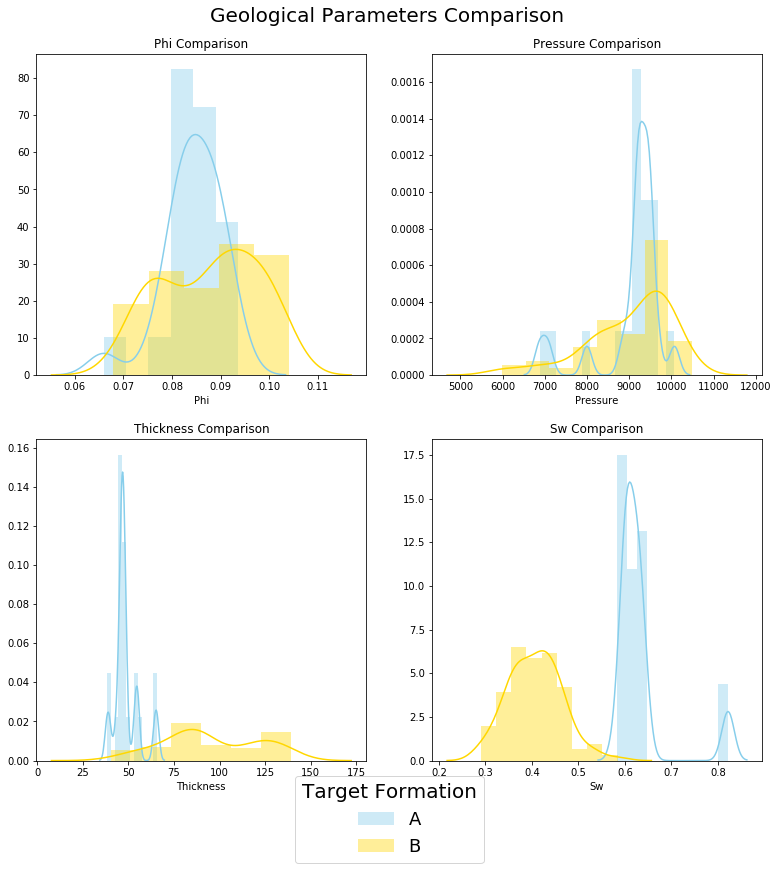

In [474]:
# plot
f, axes = plt.subplots(2, 2, figsize=(13, 13), sharex=False)


hist_phi_a = WellData[WellData.TargetFormation == 'A']
sns.distplot(hist_phi_a['PHIT'], color="skyblue", label='A', ax=axes[0, 0])
hist_phi_b = WellData[WellData.TargetFormation == 'B']
sns.distplot(hist_phi_b['PHIT'], color="gold", label='B', ax=axes[0, 0])
axes[0][0].set_title("Phi Comparison")
axes[0][0].set_xlabel("Phi")

hist_p_a = WellData[WellData.TargetFormation == 'A']
sns.distplot(hist_p_a['P_Res'], norm_hist=True, kde=True, color="skyblue", label='A', ax=axes[0, 1])
hist_p_b = WellData[WellData.TargetFormation == 'B']
sns.distplot(hist_p_b['P_Res'], norm_hist=True, kde=True, color="gold", label='B', ax=axes[0, 1])
axes[0][1].set_title("Pressure Comparison")
axes[0][1].set_xlabel("Pressure")

hist_th_a = WellData[WellData.TargetFormation == 'A']
sns.distplot(hist_th_a['TargetFormationThickness'], color="skyblue", label='A', ax=axes[1, 0])
hist_th_b = WellData[WellData.TargetFormation == 'B']
sns.distplot(hist_th_b['TargetFormationThickness'], color="gold", label='B', ax=axes[1, 0])
axes[1][0].set_title("Thickness Comparison")
axes[1][0].set_xlabel("Thickness")

hist_sw_a = WellData[WellData.TargetFormation == 'A']
sns.distplot(hist_sw_a['SWT'], color="skyblue", label='A', ax=axes[1, 1])
hist_sw_b = WellData[WellData.TargetFormation == 'B']
sns.distplot(hist_sw_b['SWT'], color="gold", label='B', ax=axes[1, 1])
axes[1][1].set_title("Sw Comparison")
axes[1][1].set_xlabel("Sw")

line_labels = ["A", "B"]
f.legend(labels=line_labels, loc="lower center", borderaxespad=0.6, title="Target Formation", fontsize=18, title_fontsize=20)
f.suptitle('Geological Parameters Comparison', fontsize=20, y = 0.93)

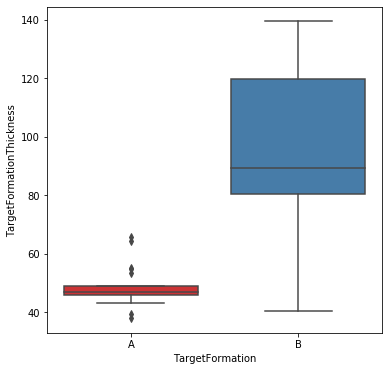

In [477]:
f, axes = plt.subplots(1, 1, figsize=(6, 6), sharex=False)
sns.boxplot(x="TargetFormation", y="TargetFormationThickness", data=WellData, palette="Set1")

##### 4) Is there a significant difference in how formation `A` vs. formation `B` wells have been completed? Using `matplotlib` and/or `seaborn`, create a visual to summarize how main completions parameters (lateral length, injected fluid, injected proppant, average stage length) differ between formation `A`- and formation `B`-landed wells.

**There is a significant difference in how wells have been completed in Formation A vs. Formation B.**
        
The following differences were observed:

    * Lateral Length: Formation B presents longer lateral lengths for its wells compared to Formation A.
    * Injected Proppant and Fluid: Formation B presents higher volumes of injected Proppant and Fluid compared to Formation A.
    * Average Stage Length: Formation B presents shorter Stage Lengths compared to Formation A.
    * Average Clusters Spacing: Formation B presents shorter Cluster Spacings compared to Formation A.
    * Average Clusters per Stage: Formation B presents mores Clusters per Stage compared to Formation A.

Please see below the details for average values and plots for Formation A and B.

In [168]:
WellGroups = WellData.groupby(['TargetFormation'])
WellGroups['LAT_LENGTH','Prop_ft','Fluid_ft','Avg_Stg_Len', 'Avg_Clust_Spc', 'Clusters_per_Stage'].mean()

,LAT_LENGTH,Prop_ft,Fluid_ft,Avg_Stg_Len,Avg_Clust_Spc,Clusters_per_Stage
TargetFormation,,,,,,
A,4385.714286,774.637046,16.381845,387.919779,299.198301,2.714286
B,6130.095745,1526.288421,37.007634,203.651828,33.794418,6.021277


Text(0.5, 0.93, 'Completion Parameters Comparison')

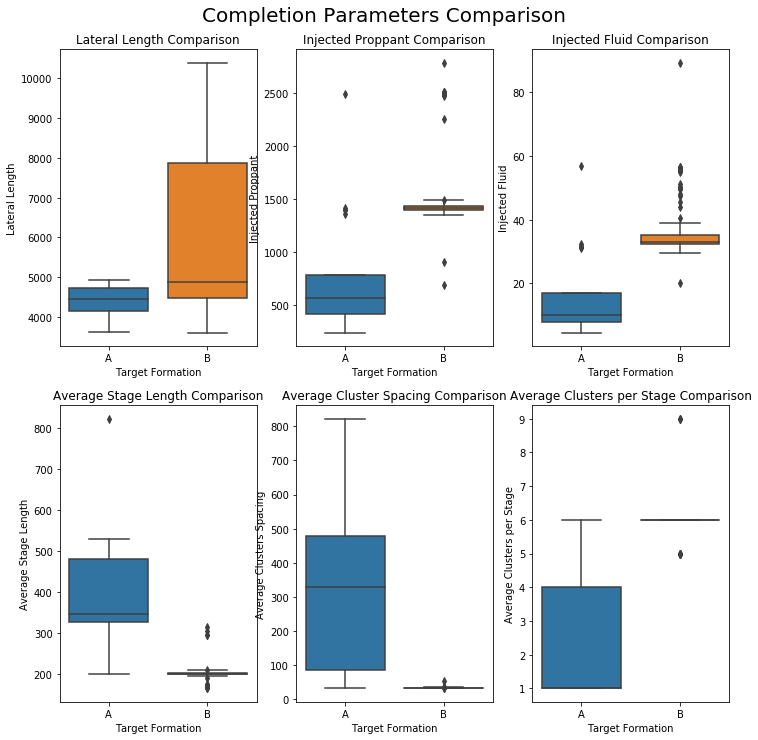

In [478]:
# plot
f, axes = plt.subplots(2, 3, figsize=(12, 12), sharex=False)

sns.boxplot(x="TargetFormation", y="LAT_LENGTH", data=WellData, ax=axes[0, 0])
axes[0][0].set_title("Lateral Length Comparison")
axes[0][0].set_xlabel("Target Formation")
axes[0][0].set_ylabel("Lateral Length")

sns.boxplot(x="TargetFormation", y="Prop_ft", data=WellData, ax=axes[0, 1])
axes[0][1].set_title("Injected Proppant Comparison")
axes[0][1].set_xlabel("Target Formation")
axes[0][1].set_ylabel("Injected Proppant")

sns.boxplot(x="TargetFormation", y="Fluid_ft", data=WellData, ax=axes[0, 2])
axes[0][2].set_title("Injected Fluid Comparison")
axes[0][2].set_xlabel("Target Formation")
axes[0][2].set_ylabel("Injected Fluid")


sns.boxplot(x="TargetFormation", y="Avg_Stg_Len", data=WellData, ax=axes[1, 0])
axes[1][0].set_title("Average Stage Length Comparison")
axes[1][0].set_xlabel("Target Formation")
axes[1][0].set_ylabel("Average Stage Length")


sns.boxplot(x="TargetFormation", y="Avg_Clust_Spc", data=WellData, ax=axes[1, 1])
axes[1][1].set_title("Average Cluster Spacing Comparison")
axes[1][1].set_xlabel("Target Formation")
axes[1][1].set_ylabel("Average Clusters Spacing")


sns.boxplot(x="TargetFormation", y="Clusters_per_Stage", data=WellData, ax=axes[1, 2])
axes[1][2].set_title("Average Clusters per Stage Comparison")
axes[1][2].set_xlabel("Target Formation")
axes[1][2].set_ylabel("Average Clusters per Stage")

f.suptitle('Completion Parameters Comparison', fontsize=20, y = 0.93)

##### 5) How does the production response vary between formation `A`- and formation `B`-landed wells? Create visualization as necessary. What do you think is causing the observed difference in production response from these two formations? 

Formation B exhibits more cumulative production than Formation A (41% more). This production response is related to both Reservoir Parameters and Completion Parameters.
    
    * Reservoir Parameters: In terms of the information provided in WellData.csv, Formation B evidences a higher formation thickness compared to Formation A (95 vs. 49).   
    * Completion Parameters: Several parameters were observed in Formation B that favor its Cumulative Production.
        
        - Lateral Length: Formation B Lateral Lengths are longer, which favors the well production due to the increased contact area.
        - Injected Propant/Fluid: Formation B wells received higher volumes of proppant and fluid. Since Average Pressure levels and ranges are similar, more SRV is expected in Formation B. 
        - Average Stage Length: Formation B exhibits lower stage lengths, allowing more energy for fracture propagation.
        - Cluster Spacing: 
            + Formation A exhibits larger cluster spacings compared to Formation B. 
            + For large spacings, the area between major fractures cannot be stimulated completely and reservoir recovery extent will be adversely impacted, which is the case of Formation A. 
            + Most likely, fractures in Formation A are not stimulated completely and cluster spacing should be reduced to enlarge stimulated area overlapping and thus enlarge SRV.
        - Clusters per Stage: Formation B consistently presents a higher value of clusters per stage.
            + Most likely, Formation B presents a higher amount of fractures with larger SRVs.
            
Please see below details of Cumulative Production averave and plots for Formation A and B.

In [163]:
WellGroups['CumOil_24Months'].mean()

TargetFormation
A    154560.389025
B    263306.633845
Name: CumOil_24Months, dtype: float64

Text(0.5, 0.94, 'Production Comparison')

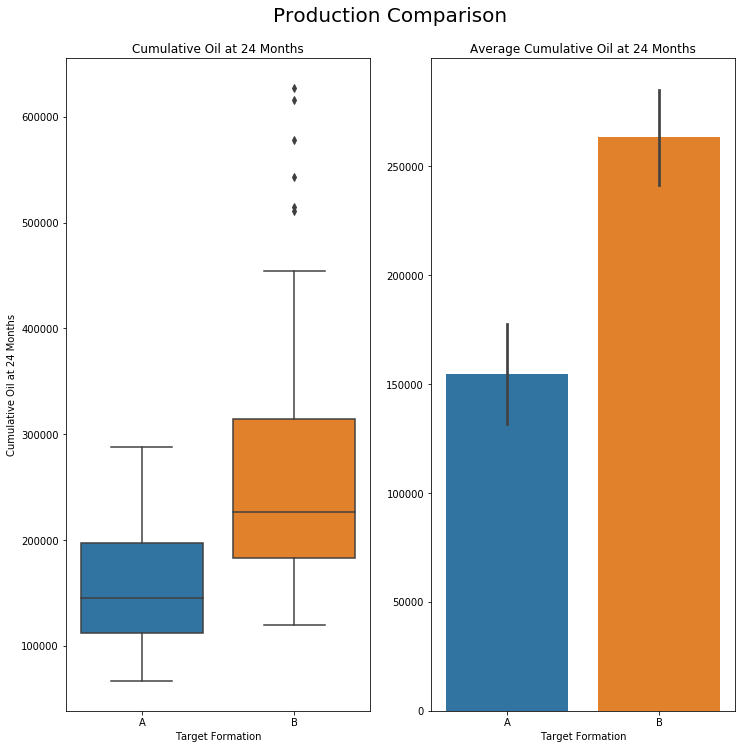

In [493]:
# plot
f, axes = plt.subplots(1, 2, figsize=(12, 12), sharex=False)

sns.boxplot(x="TargetFormation", y="CumOil_24Months", data=WellData, ax=axes[0])
axes[0].set_title("Cumulative Oil at 24 Months")
axes[0].set_xlabel("Target Formation")
axes[0].set_ylabel("Cumulative Oil at 24 Months")

#sns.boxplot(x="TargetFormation", y="Prop_ft", data=WellData, ax=axes[1])
sns.barplot(x="TargetFormation", y="CumOil_24Months", data=WellData, ax=axes[1])
axes[1].set_title("Average Cumulative Oil at 24 Months")
axes[1].set_xlabel("Target Formation")
axes[1].set_ylabel("")

f.suptitle('Production Comparison', fontsize=20, y = 0.94)

##### 6) Perform a statistical test to determine if the observed difference in mean production response (between formations `A` and `B`) is statistically significant.

First, it is necessary to determine wether the Production Response follows an approximate normal distribution for each formation:

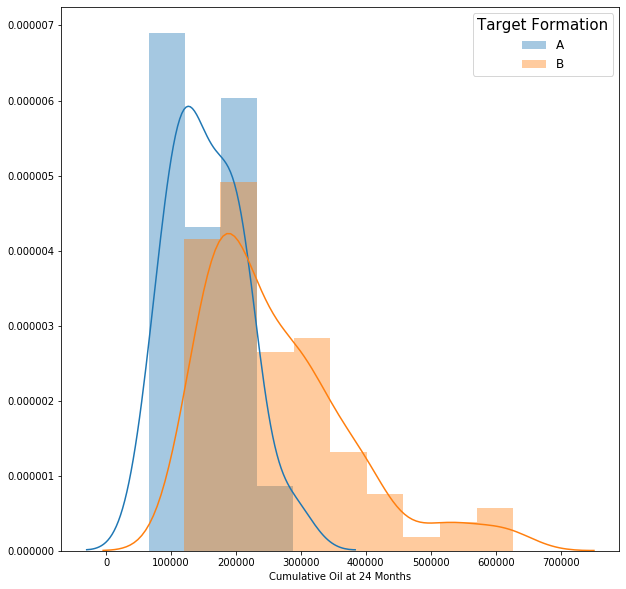

In [473]:
# plot
f, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=False)

hist = WellData[WellData.TargetFormation == 'A']
sns.distplot(hist['CumOil_24Months'], label='A')
hist = WellData[WellData.TargetFormation == 'B']
sns.distplot(hist['CumOil_24Months'], label='B', axlabel='Cumulative Oil at 24 Months')


plt.legend(title="Target Formation", title_fontsize= 15, fontsize='larger')

Having verified this, we calculate the T-test for the means of two independent samples.

We will use the **ttest_ind** module from scipy.stats:
    * This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
    * This test assumes that the populations have identical variances by default.
    
We will select a p value of 5% or 0.05.

**The results show that the Null Hypothesis is rejected and that the difference is statistically significant**

In [211]:
#from scipy import stats

CumOil_A = WellData[WellData['TargetFormation'] == 'A']['CumOil_24Months']
CumOil_B = WellData[WellData['TargetFormation'] == 'B']['CumOil_24Months']

# Calculate the T-test for the means of two independent samples of scores.
# t-tests are used when one or both of the groups have fewer than 30 members.
# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.
# p value: The two-tailed p-value.

t, p = stats.ttest_ind(CumOil_A,CumOil_B)
print("t = " + str(t))
print("p = " + str(p))

if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

t = -4.281592055934412
p = 3.910261959001755e-05
Reject null hypothesis


##### 7) Using `scikit-learn`, divide the data into training and testing sets (75% training, 25% testing).

In [293]:
WellData=WellData.drop(['COUNTER'], axis=1)
WellData

,TargetFormation,TargetFormationThickness,BVW,PHIT,PR,SWT,VCL,YM,PGRAD,P_Res,...,3D_Spacing,LAT_LENGTH,PPG,Prop_ft,Fluid_ft,Avg_Stg_Len,Avg_Clust_Spc,Clusters_per_Stage,Rate_per_cluster,CumOil_24Months
WellName,,,,,,,,,,,,,,,,,,,,,
Well 1,A,48.099029,2.319936,0.080282,0.080282,0.600788,0.147393,38.672344,0.845430,9470.505426,...,1123.998119,4579,1.236471,390.265123,7.514960,508.777778,508.777778,1,48.780000,85767.71658
Well 2,A,47.661448,2.287712,0.079972,0.079972,0.600198,0.145248,38.963685,0.846117,9475.665033,...,1273.997571,4625,1.181445,391.161081,7.883027,513.888889,513.888889,1,49.780000,165623.71340
Well 3,B,87.939873,3.380522,0.096938,0.218695,0.396555,0.231885,34.838832,0.837477,9651.080534,...,834.240524,4036,0.709314,1434.960357,48.167245,168.166667,33.633333,5,17.580833,194886.78360
Well 4,B,88.051987,3.390739,0.097546,0.219903,0.394770,0.229876,34.619501,0.837942,9665.658490,...,1180.581605,4141,0.730231,1391.224342,45.361507,295.785714,32.865079,9,11.073016,172405.75800
Well 5,B,88.040865,3.898508,0.101526,0.219746,0.436152,0.257077,32.950645,0.846151,9774.742082,...,822.702861,4472,0.690833,1488.193202,51.290474,165.629630,32.172662,5,17.888148,207418.55400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Well 111,B,91.054007,3.476534,0.098800,0.228029,0.386448,0.234235,34.302323,0.834730,9428.276073,...,1087.282417,4875,0.972418,1440.480000,35.269949,195.000000,32.500000,6,8.347200,166501.82300
Well 112,B,117.802525,4.230607,0.067927,0.192165,0.528692,0.182282,46.592040,0.705602,7261.350625,...,1400.000000,4095,0.948113,1449.098901,36.390535,195.000000,32.500000,6,8.747619,149973.75810
Well 113,B,85.416697,2.858090,0.089659,0.200040,0.373199,0.244244,35.611307,0.848498,9822.209526,...,1400.000000,4833,0.972172,1404.961722,34.409019,201.375000,33.562500,6,9.570833,280928.83440


In [294]:
import sklearn as sk
#from sklearn.model_selection import train_test_split

x = WellData.drop(['CumOil_24Months'], axis=1)
y = WellData.CumOil_24Months

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)
print("\nx_train:\n")
print(x_train.head())
print(x_train.shape)

print("\nx_test:\n")
print(x_test.head())
print(x_test.shape)


x_train:

         TargetFormation  TargetFormationThickness       BVW      PHIT  \
WellName                                                                 
Well 59                B                127.386360  4.301639  0.075717   
Well 66                B                 97.582009  3.240405  0.093692   
Well 87                B                 82.869652  3.406000  0.095202   
Well 35                B                 83.337339  3.382836  0.093640   
Well 113               B                 85.416697  2.858090  0.089659   

                PR       SWT       VCL         YM     PGRAD        P_Res  \
WellName                                                                   
Well 59   0.201597  0.445981  0.191612  47.262512  0.615320  6055.359682   
Well 66   0.203521  0.354425  0.221820  41.683697  0.767584  8398.901951   
Well 87   0.189237  0.431720  0.228748  36.828458  0.844870  9786.126233   
Well 35   0.188690  0.433493  0.236519  37.069167  0.844239  9824.410558   
Well 113  0.20

##### 8) Using `scikit-learn`, train a `multiple linear regression` model for `CumOil_24Months` using `all` the geologic and completions parameters as your explanatory variables. Test the model, plot the results, and summarize relative statistics.

In [297]:
# Checking columns with NaN values
WellData.isnull().any()

TargetFormation             False
TargetFormationThickness    False
BVW                         False
PHIT                        False
PR                          False
SWT                         False
VCL                         False
YM                          False
PGRAD                       False
P_Res                       False
GOR                         False
3D_Spacing                  False
LAT_LENGTH                  False
PPG                         False
Prop_ft                     False
Fluid_ft                    False
Avg_Stg_Len                 False
Avg_Clust_Spc               False
Clusters_per_Stage          False
Rate_per_cluster            False
CumOil_24Months             False
dtype: bool

In [307]:
# Converting data from 'TargerFormation' (Categorical Variables) to Binary Variables.
WellData_LReg=pd.get_dummies(WellData)
WellData_LReg

,TargetFormationThickness,BVW,PHIT,PR,SWT,VCL,YM,PGRAD,P_Res,GOR,...,PPG,Prop_ft,Fluid_ft,Avg_Stg_Len,Avg_Clust_Spc,Clusters_per_Stage,Rate_per_cluster,CumOil_24Months,TargetFormation_A,TargetFormation_B
WellName,,,,,,,,,,,,,,,,,,,,,
Well 1,48.099029,2.319936,0.080282,0.080282,0.600788,0.147393,38.672344,0.845430,9470.505426,1468.748419,...,1.236471,390.265123,7.514960,508.777778,508.777778,1,48.780000,85767.71658,1,0
Well 2,47.661448,2.287712,0.079972,0.079972,0.600198,0.145248,38.963685,0.846117,9475.665033,1491.233642,...,1.181445,391.161081,7.883027,513.888889,513.888889,1,49.780000,165623.71340,1,0
Well 3,87.939873,3.380522,0.096938,0.218695,0.396555,0.231885,34.838832,0.837477,9651.080534,1548.827181,...,0.709314,1434.960357,48.167245,168.166667,33.633333,5,17.580833,194886.78360,0,1
Well 4,88.051987,3.390739,0.097546,0.219903,0.394770,0.229876,34.619501,0.837942,9665.658490,1503.367385,...,0.730231,1391.224342,45.361507,295.785714,32.865079,9,11.073016,172405.75800,0,1
Well 5,88.040865,3.898508,0.101526,0.219746,0.436152,0.257077,32.950645,0.846151,9774.742082,1500.119838,...,0.690833,1488.193202,51.290474,165.629630,32.172662,5,17.888148,207418.55400,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Well 111,91.054007,3.476534,0.098800,0.228029,0.386448,0.234235,34.302323,0.834730,9428.276073,1437.805232,...,0.972418,1440.480000,35.269949,195.000000,32.500000,6,8.347200,166501.82300,0,1
Well 112,117.802525,4.230607,0.067927,0.192165,0.528692,0.182282,46.592040,0.705602,7261.350625,4890.431130,...,0.948113,1449.098901,36.390535,195.000000,32.500000,6,8.747619,149973.75810,0,1
Well 113,85.416697,2.858090,0.089659,0.200040,0.373199,0.244244,35.611307,0.848498,9822.209526,1446.207436,...,0.972172,1404.961722,34.409019,201.375000,33.562500,6,9.570833,280928.83440,0,1


In [308]:
# To avoid collinearity, we have to drop one of the dummy columns.
# Drop TargetFormation_B column.
WellData_LReg.drop('TargetFormation_B',axis=1,inplace=True)

# Rename TargetFormation_A column.
WellData_LReg.rename(columns={'TargetFormation_A':'TargetFormation'}, inplace=True)

# dataframe first 5 columns.
WellData_LReg.head()

,TargetFormationThickness,BVW,PHIT,PR,SWT,VCL,YM,PGRAD,P_Res,GOR,...,LAT_LENGTH,PPG,Prop_ft,Fluid_ft,Avg_Stg_Len,Avg_Clust_Spc,Clusters_per_Stage,Rate_per_cluster,CumOil_24Months,TargetFormation
WellName,,,,,,,,,,,,,,,,,,,,,
Well 1,48.099029,2.319936,0.080282,0.080282,0.600788,0.147393,38.672344,0.845430,9470.505426,1468.748419,...,4579,1.236471,390.265123,7.514960,508.777778,508.777778,1,48.780000,85767.71658,1
Well 2,47.661448,2.287712,0.079972,0.079972,0.600198,0.145248,38.963685,0.846117,9475.665033,1491.233642,...,4625,1.181445,391.161081,7.883027,513.888889,513.888889,1,49.780000,165623.71340,1
Well 3,87.939873,3.380522,0.096938,0.218695,0.396555,0.231885,34.838832,0.837477,9651.080534,1548.827181,...,4036,0.709314,1434.960357,48.167245,168.166667,33.633333,5,17.580833,194886.78360,0
Well 4,88.051987,3.390739,0.097546,0.219903,0.394770,0.229876,34.619501,0.837942,9665.658490,1503.367385,...,4141,0.730231,1391.224342,45.361507,295.785714,32.865079,9,11.073016,172405.75800,0
Well 5,88.040865,3.898508,0.101526,0.219746,0.436152,0.257077,32.950645,0.846151,9774.742082,1500.119838,...,4472,0.690833,1488.193202,51.290474,165.629630,32.172662,5,17.888148,207418.55400,0


In [315]:
# Now we proceed to create the variables and train the Multiple Linear Regression Model
x = WellData_LReg.drop('CumOil_24Months', axis=1)
y = WellData_LReg.CumOil_24Months

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [335]:
print(mlr.coef_)
print(mlr.intercept_)

[-3.98101096e+03  1.27470775e+05 -6.63480676e+06 -8.63497830e+05
 -8.31491175e+05  6.99395878e+05  5.35557259e+03  7.76958576e+05
 -1.82032178e+01 -2.80602701e+01  1.33690342e+01  3.44866785e+01
  4.61366389e+04  5.15006131e+01  2.32383441e+03  3.86354651e+02
 -3.77901710e+02 -8.08873339e+03  1.00652746e+03 -4.37283392e+04]
95383.60747694972


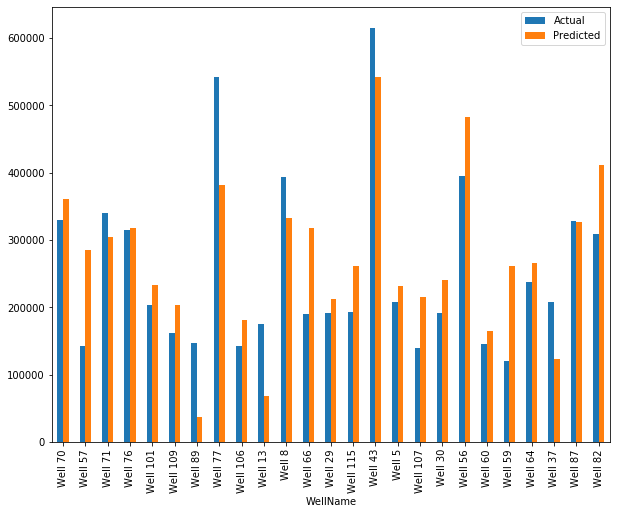

In [390]:
# Plot the results
y_pred = mlr.predict(x_test)

Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Comparison1 = Comparison.head(25)

Comparison1.plot(kind='bar',figsize=(10,8))
plt.show()

In [359]:
# Summarize relative statistics
# This score is the R squared of our model

mlr.score(x,y)

0.6398415816562699

In [370]:
WellData_LReg.corr()

,TargetFormationThickness,BVW,PHIT,PR,SWT,VCL,YM,PGRAD,P_Res,GOR,...,LAT_LENGTH,PPG,Prop_ft,Fluid_ft,Avg_Stg_Len,Avg_Clust_Spc,Clusters_per_Stage,Rate_per_cluster,CumOil_24Months,TargetFormation
TargetFormationThickness,1.000000,0.857824,-0.290272,0.602774,-0.394183,0.079140,0.468060,-0.306447,-0.167979,0.534763,...,0.359981,-0.256499,0.503176,0.481788,-0.450055,-0.450943,0.486282,-0.471192,0.353170,-0.610194
BVW,0.857824,1.000000,-0.255826,0.370434,0.021734,-0.040355,0.390150,-0.134622,-0.042748,0.365038,...,0.138274,-0.176092,0.317514,0.318907,-0.277040,-0.271110,0.281411,-0.286402,0.218873,-0.316331
PHIT,-0.290272,-0.255826,1.000000,0.169797,-0.402812,0.313720,-0.763772,0.421525,0.412136,-0.493668,...,-0.026923,-0.273536,-0.083463,0.035042,-0.073043,-0.084687,0.102773,-0.061836,-0.135013,-0.141273
PR,0.602774,0.370434,0.169797,1.000000,-0.778769,0.612500,-0.024953,-0.177776,0.034848,0.239878,...,0.306685,-0.554125,0.563283,0.616888,-0.706856,-0.697769,0.741235,-0.698817,0.356846,-0.966686
SWT,-0.394183,0.021734,-0.402812,-0.778769,1.000000,-0.515960,0.186085,0.127049,-0.018156,-0.134162,...,-0.405835,0.430732,-0.416370,-0.459278,0.529906,0.532442,-0.587585,0.528239,-0.279589,0.836568
VCL,0.079140,-0.040355,0.313720,0.612500,-0.515960,1.000000,-0.384293,0.201684,0.312851,-0.241417,...,0.058941,-0.381356,0.233816,0.294122,-0.406293,-0.400802,0.414514,-0.397627,0.265382,-0.599549
YM,0.468060,0.390150,-0.763772,-0.024953,0.186085,-0.384293,1.000000,-0.565810,-0.506850,0.684387,...,0.263211,0.235529,0.208975,0.065350,-0.061026,-0.048768,0.061215,-0.080563,0.209488,-0.001424
PGRAD,-0.306447,-0.134622,0.421525,-0.177776,0.127049,0.201684,-0.565810,1.000000,0.895238,-0.825115,...,-0.112227,0.002689,-0.315233,-0.231946,0.211115,0.202130,-0.199773,0.205255,0.097847,0.239258
P_Res,-0.167979,-0.042748,0.412136,0.034848,-0.018156,0.312851,-0.506850,0.895238,1.000000,-0.773709,...,-0.018632,-0.158405,-0.135085,-0.037666,-0.019082,-0.030654,0.021934,-0.024202,0.226213,0.016803
GOR,0.534763,0.365038,-0.493668,0.239878,-0.134162,-0.241417,0.684387,-0.825115,-0.773709,1.000000,...,0.198634,-0.014322,0.360630,0.278388,-0.206641,-0.224841,0.280513,-0.242593,-0.025537,-0.294095


##### 9) Is it a good practice to include all features in the model? Explain how model complexity may impact in-sample and out-of-sample accuracy?

This may not be necessarily is a good practice. Simplicity and theoretical foundations needs to be combined. 

* When several models with similar predictive power are available, it is better to choose the simplest model. This is because simplification usually produces more precise models. 
* In addition, the foundations of the model selection process should depend largely on theoretical concerns. Theory supports the collection of the right data and also benefits the best regression.

A good approach is to start simple and the add complexity only when it is actually needed. As complexity increases, the in-sample accuracy increases since the model is likely to be tailored for the particular dataset. However, the out-of-sample accuracy may be affected negatively since overfitting reduces generalizability, generating unreliable results instead of actual relationships in the population. 


##### 10) What would be your strategy for building the `best parsimonious model`? How would you choose the most important features? 

Parsimonious models explain data with a minimum number of independent variables. While working with multiple linear regression models, finding the right balance between parsimony and goodness of fit can be challenging. 

There are statistical parameters able to help selecting variables to Include or exclude in the regression:
    
* R-squared: 
    - When R-squared is less than 0.8, generally the match is not good. However, there may still be redundant variables when R-squared is above 0.8
    -  This parameter tends to rise as more variables are added, even if they have no significant contribution. 
* Adjusted R-squared: penalizes R-squared values that include non-useful predictors. 
    -  If it is much less than R-squared, it is a sign that a variable might be unnecessary.
    -  Monitor changes when including or excluding variables in the regression model.
* F-statistic: suggests the strength of the entire model. If some of the predictors are correlated, F-tests can come out significant.
* T-test: looks at the relationship between the target variable, and every predictor variable, independently.
    -  In this case, the p-value for each variable needs to be checked.
    -  The null hypothesis is rejected when the p-value is small
* Multicollinearity: check high correlation between two variables such that the two variables contribute redundant information to the model.

Finally, there are variable selection methods to help choose which variables to include in multiple regressions:

* Backward elimination:  all independent variables begin in the model and subsequent variables are eliminated.
* Forward selection: one independent variable is added at a time that increases the R2 value. 
* Stepwise selection: a combination of the previous mentioned methods.


##### 11) Using `scikit-learn`, perform principal coordinates analysis of the geologic features. Plot the resulting PC1 and PC2 as a scatter plot and color the points based on `TargetFormation`. 

In [466]:
from sklearn.decomposition import PCA

# PCA is affected by scale so you need to scale the features in your data before applying PCA.
# The principal components are supplied with normalized version of original predictors. 
# This is because, the original predictors may have different scales
# from sklearn.preprocessing import StandardScaler

# Geologic parameters: porosity, saturation, thickness, pressure
# Target: TargetFormation

# Separating out the features
#x = WellData.loc[:, features].values
x = WellData[['PHIT', 'SWT', 'TargetFormationThickness', 'P_Res']]

# Separating out the target
y = WellData[['TargetFormation']]

## Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,0.266810,2.066143
1,0.281039,2.076178
2,-1.233661,-0.410609
3,-1.291819,-0.430253
4,-1.544611,-0.173551
...,...,...
110,-1.238990,-0.602643
111,3.026321,-0.182717
112,-0.872862,-0.409833
113,-0.622018,2.173910


In [468]:
# We need to reset the index in order to create a new dataframe by concatenating the Target Formation and the PCs
WellData_resetindex = WellData.reset_index()
WellData_resetindex[['TargetFormation']]

finalDf = pd.concat([principalDf, WellData_resetindex[['TargetFormation']]], axis = 1)
finalDf

,PC1,PC2,TargetFormation
0,0.266810,2.066143,A
1,0.281039,2.076178,A
2,-1.233661,-0.410609,B
3,-1.291819,-0.430253,B
4,-1.544611,-0.173551,B
...,...,...,...
110,-1.238990,-0.602643,B
111,3.026321,-0.182717,B
112,-0.872862,-0.409833,B
113,-0.622018,2.173910,A


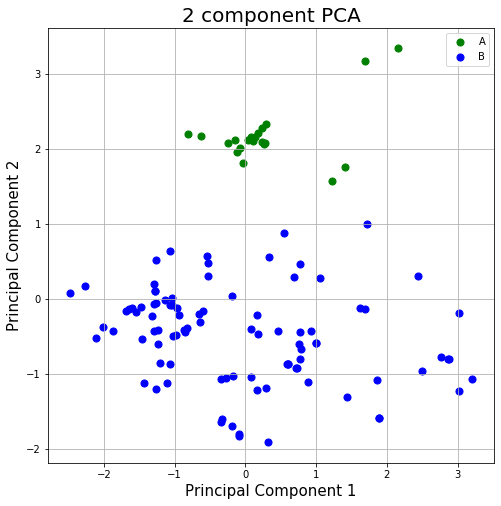

In [469]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B']
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TargetFormation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [470]:
pca.explained_variance_ratio_

array([0.40402517, 0.35425437])

Text(0.5, 1.0, 'Scree Plot')

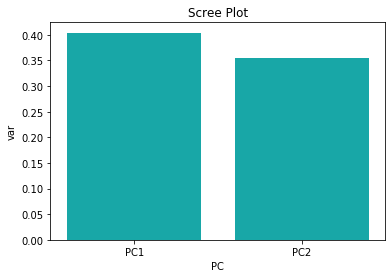

In [472]:
ScreeDf = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", data=ScreeDf, color="c")
plt.title('Scree Plot')

##### 12) Is PCA successful in unsupervised clustering of wells into formation `A` vs. formation `B` wells? If yes, which principal component separates formation A from Formation B wells?

* For this particular exercise, the PCA was successful in clustering of Wells into Formation A vs. Formation B.
    -  The principal components correspond to the directions of maximum variability. However, it is important to mention that they do not guarantee maximum discrimination or separation between classes.

* For this exercise, PC2 separates formation A from Formation B wells. PC1 accounts for almost all the variance, but has no discriminatory power.




### Part 3)

##### 1) Read the following data files for a given well:
- `WellLogs.csv` which includes petro-physical well logs. Each zone (formation) is identified with a label. 
- `Formations.csv` which includes top and bottom MDs of each zone.
- `DNAFormationContributions.csv` which includes an estimate of how much each zone contributes to total liquid production.

In [570]:
WellLogs = pd.read_csv('WellLogs.csv')
Formations = pd.read_csv('Formations.csv')
DNA = pd.read_csv('DNAFormationContributions.csv')

##### 2) Calculate `Brittleness Index` for each depth as defined by the fraction of total rock volume that is made of quartz and calcite. Hint: Use the last 6 columns of `WellLogs.csv`.

In [526]:
# Last 6 columns do not include TOC
WellLogs_BI=WellLogs
WellLogs_BI['TRV']=WellLogs_BI['VQTZ']+WellLogs_BI['VPYR']+WellLogs_BI['VCL']+WellLogs_BI['VCALC']
WellLogs_BI['Q+C']=WellLogs_BI['VQTZ']+WellLogs_BI['VCALC']
WellLogs_BI['BI']=WellLogs_BI['Q+C']/WellLogs_BI['TRV']
WellLogs_BI

,MD,Zone,GR,KAIR,NEU,PE,PHIT,SWT,TOC,VCALC,VCL,VKER,VOIL,VPYR,VQTZ,TRV,Q+C,BI
0,10050,A1,101.697227,0.000201,0.167445,4.000277,0.062168,0.375907,0.027114,0.427140,0.102950,0.064822,0.038820,0.014632,0.332666,0.877388,0.759806,0.865986
1,10060,A1,107.797100,0.000086,0.134535,4.177762,0.049613,0.530793,0.019847,0.559585,0.065400,0.047952,0.023350,0.008231,0.271999,0.905215,0.831585,0.918660
2,10070,A2,99.086056,0.000044,0.131360,3.726822,0.053083,0.576101,0.021809,0.172476,0.083956,0.055361,0.022467,0.015788,0.625215,0.897436,0.797691,0.888856
3,10080,A2,108.058048,0.000183,0.167135,3.517681,0.070519,0.375680,0.031486,0.089278,0.125994,0.075352,0.044127,0.022451,0.625227,0.862950,0.714505,0.827980
4,10090,A2,113.019047,0.000113,0.169545,3.935149,0.064609,0.423886,0.026631,0.044797,0.160126,0.065208,0.037230,0.019117,0.657353,0.881393,0.702150,0.796637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,11260,C,112.550102,0.000405,0.223433,3.234017,0.083424,0.450923,0.025771,0.003641,0.286483,0.060343,0.045831,0.020217,0.565495,0.875835,0.569136,0.649821
90,11280,C,110.705902,0.000147,0.180583,4.800201,0.068065,0.762003,0.015327,0.015974,0.213699,0.039618,0.016181,0.012214,0.665046,0.906933,0.681020,0.750905
91,11300,C,104.672749,0.000080,0.155010,3.696765,0.059227,0.792062,0.015672,0.069522,0.158378,0.040922,0.012661,0.012505,0.670274,0.910678,0.739795,0.812357
92,11320,C,109.123848,0.000013,0.169026,4.386390,0.041564,1.000000,0.007348,0.030593,0.254298,0.020034,0.000000,0.006034,0.664855,0.955779,0.695448,0.727624


##### 3) Calculate average properties for each zone using `groupby` function.

In [529]:
WellLogs_BI.groupby(['Zone']).mean()

,MD,GR,KAIR,NEU,PE,PHIT,SWT,TOC,VCALC,VCL,VKER,VOIL,VPYR,VQTZ,TRV,Q+C,BI
Zone,,,,,,,,,,,,,,,,,
A1,10055.000000,104.747164,0.000144,0.150990,4.089019,0.055891,0.453350,0.023480,0.493363,0.084175,0.056387,0.031085,0.011432,0.302333,0.891302,0.795695,0.892323
A2,10100.000000,97.567045,0.000090,0.142152,3.942242,0.057819,0.425592,0.025402,0.186274,0.096923,0.062225,0.033504,0.018255,0.585289,0.886741,0.771563,0.869173
A3,10155.000000,96.394148,0.000047,0.130900,3.934197,0.051825,0.544223,0.020106,0.197811,0.091817,0.051163,0.023567,0.014551,0.599253,0.903433,0.797065,0.882445
A4,10238.000000,73.638632,0.000010,0.091603,4.797253,0.036302,0.471404,0.012132,0.410623,0.044297,0.031626,0.017654,0.008777,0.471467,0.935164,0.882090,0.943042
A5,10285.000000,74.017006,0.000034,0.099701,4.646792,0.045228,0.362570,0.018785,0.403404,0.032325,0.045347,0.027225,0.013469,0.462481,0.911680,0.865886,0.948803
A6,10325.000000,79.165456,0.000114,0.118086,4.683020,0.051411,0.731424,0.015184,0.360822,0.064800,0.038914,0.016761,0.010987,0.477582,0.914192,0.838405,0.916211
B1,10400.000000,99.389460,0.000215,0.160935,4.598812,0.065537,0.643939,0.016368,0.103660,0.169780,0.040016,0.023558,0.012947,0.619879,0.906265,0.723538,0.798397
B2,10511.818182,93.535800,0.000140,0.177770,4.296407,0.063145,0.602159,0.018240,0.096263,0.213281,0.042640,0.026476,0.014621,0.584866,0.909031,0.681129,0.750265
B3,10600.000000,89.334879,0.000182,0.210283,4.462783,0.066876,0.925829,0.010911,0.133720,0.289361,0.023763,0.002952,0.008998,0.497352,0.929431,0.631072,0.678613


##### 4) Create a visualization with 5 log tracks vs. depth: `gamma ray`, `brittleness index`, `oil volume`, `water volume`, and `formation contribution to liquid production`.

In [700]:
# We have to merge the DNA Relative Contribution with the WellLogs data. 
# This will be done merging the 'Zone' in WellLogs, with 'Formation' in DNA. This is similar to a LOOKUP function in Excel.

WLplot=WellLogs_BI.merge(DNA, left_on='Zone', right_on='Formation')

# Now we choose the Logs we want to plot
WLplot=WellLogs_BI_plot[['MD', 'Zone', 'GR', 'BI', 'VOIL', 'SWT', 'RelativeContribution']]
WLplot

,MD,Zone,GR,BI,VOIL,SWT,RelativeContribution
0,10050,A1,101.697227,0.865986,0.038820,0.375907,0.040967
1,10060,A1,107.797100,0.918660,0.023350,0.530793,0.040967
2,10070,A2,99.086056,0.888856,0.022467,0.576101,0.024071
3,10080,A2,108.058048,0.827980,0.044127,0.375680,0.024071
4,10090,A2,113.019047,0.796637,0.037230,0.423886,0.024071
...,...,...,...,...,...,...,...
89,11260,C,112.550102,0.649821,0.045831,0.450923,0.005853
90,11280,C,110.705902,0.750905,0.016181,0.762003,0.005853
91,11300,C,104.672749,0.812357,0.012661,0.792062,0.005853
92,11320,C,109.123848,0.727624,0.000000,1.000000,0.005853


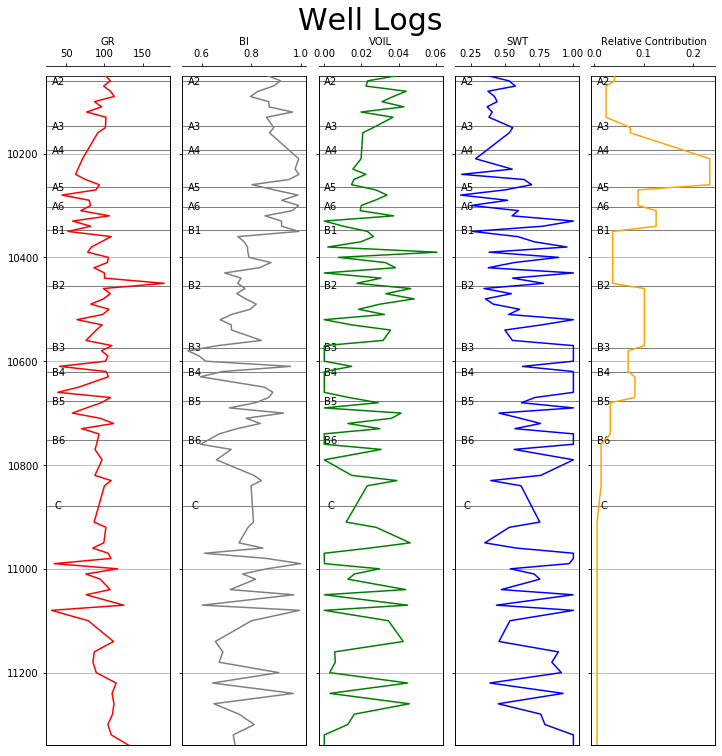

In [701]:
tops = Formations.Formation
tops_depths=Formations.TopMD

# Create the figure and subplots
def logs_plot(top_depth,bottom_depth):
    
#  logs = plot[(plot.MD >= top_depth) & (plot.MD <= bottom_depth)]
  fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,12), sharey=True)
  fig.suptitle('Well Logs', fontsize=30)
  fig.subplots_adjust(top=0.90, wspace=0.1)

#General setting for all axis
  for axes in ax:
     axes.set_ylim (top_depth,bottom_depth)
     axes.invert_yaxis()
     axes.yaxis.grid(True)
     axes.get_xaxis().set_visible(False) 
     for (i,j) in zip(tops_depths,tops):
         if ((i>=top_depth) and (i<=bottom_depth)):
             axes.axhline(y=i, linewidth=0.5, color='black')
             axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

#track 1
  ax01=ax[0].twiny()
#  ax01.invert_yaxis()
#  ax01.set_xlim(-100,10)
  ax01.spines['top'].set_position(('outward',10))
  ax01.set_xlabel('GR', color='black')
  ax01.plot(WLplot.GR, WLplot.MD, label='GR', color='red')
#  ax01.set_xlabel('GR',color='blue')    
#  ax01.tick_params(axis='x', colors='blue')
#  ax01.grid(True)

#track 2
  ax02=ax[1].twiny()
#  ax02.invert_yaxis()
  ax02.plot(WLplot.BI, WLplot.MD, color='gray')
  #ax02.set_xlim(25, 155)
  ax02.set_xlabel('BI', color='black')
  ax02.spines['top'].set_position(('outward', 10))

#track 3
  ax03=ax[2].twiny()
#  ax03.invert_yaxis()
  ax03.plot(WLplot.VOIL, WLplot.MD, color='green')
  #ax03.set_xlim(25, 155)
  ax03.set_xlabel('VOIL', color='black')
  ax03.spines['top'].set_position(('outward', 10))

#track 4
  ax04=ax[3].twiny()
#  ax04.invert_yaxis()
  ax04.plot(WLplot.SWT, WLplot.MD, color='blue')
  ax04.set_xlabel('SWT', color='black')
  ax04.spines['top'].set_position(('outward', 10))

#track 5
  ax05=ax[4].twiny()
#  ax05.invert_yaxis()
  ax05.plot(WLplot.RelativeContribution, WLplot.MD, color='orange')
  ax05.set_xlabel('Relative Contribution', color='black')
  ax05.spines['top'].set_position(('outward', 10))

logs_plot(WLplot.MD.min(),WLplot.MD.max())

##### 5) How does the brittleness index for zones A4-A6 compare with other zones? How about contribution to production according DNA diagnostics?

* The BI for zones A4-A6 is higher compared with the rest of the zones. 
* This is directly proportional to the DNA Formation Contribution: the higher the BI, the higher the Relative Contribution.

##### 6) Generally speaking, how does formation contribution (to liquid production) correlate with formation-average brittleness index? How would you explain the observed relationship?

* Generally speaking, Formation Contribution to liquid production should increase directly proportional to BI.
* The observed relationship supports the higher contribution due to higher BI. For reservoir rocks including shale, the BI measures their fracturability, theferore, they tend to form a complex network of fractures, which favors the liquid movement towards the well.

Please find below the supporting scatter plot for Formation Contribution vs. Brittleness Index. While BI increases, the Formation Contribution increases as well.

In [703]:
meanWLplot = WLplot.groupby(['Zone']).mean() 
meanWLplot.reset_index(inplace=True)
meanWLplot

,Zone,MD,GR,BI,VOIL,SWT,RelativeContribution
0,A1,10055.000000,104.747164,0.892323,0.031085,0.453350,0.040967
1,A2,10100.000000,97.567045,0.869173,0.033504,0.425592,0.024071
2,A3,10155.000000,96.394148,0.882445,0.023567,0.544223,0.073145
3,A4,10238.000000,73.638632,0.943042,0.017654,0.471404,0.233410
4,A5,10285.000000,74.017006,0.948803,0.027225,0.362570,0.088705
5,A6,10325.000000,79.165456,0.916211,0.016761,0.731424,0.125099
6,B1,10400.000000,99.389460,0.798397,0.023558,0.643939,0.037503
7,B2,10511.818182,93.535800,0.750265,0.026476,0.602159,0.101365
8,B3,10600.000000,89.334879,0.678613,0.002952,0.925829,0.068528
9,B4,10652.500000,79.839968,0.801620,0.003321,0.929620,0.082264


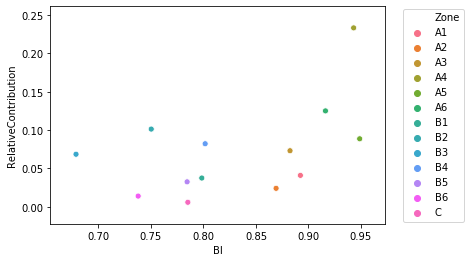

In [704]:
scatplot=sns.scatterplot(x="BI", y="RelativeContribution", hue="Zone", data=meanWLplot)
scatplot.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)

##### 7) Are zones B3 and B4 more likely to contribute to `water production` or `oil production`? Why?

* According to the Well Log plot, Zones B3 and B4 more likely contribute water production
* The oil contribution from these zones is likely to be negligible, since the VOIL is very low.

## Unix

Unix commands are often used at Biota and data science in general.

Write the commands necessary to:
1. Create a directory named "test"
2. Create an empty file name "foo.txt"
3. Create a directory inside of "test" called "temp"
3. Copy "foo.txt" into "temp"
4. Change the name of "foo.txt" to "bar.txt"
5. Print the path to the current working directory
5. Change the current working directory to home
5. Explain the difference between a relative and absolute path

## GitHub

1. Write the command to clone a directory called "git@github.com:user/foo" (not a real repository)
2. Change into that directory
3. Create a branch called "test"
4. change into that branch
5. Create an empty file name "foo.txt"
6. Add that file to the staging area
7. Commit that file
8. Push that file to the master branch on github


**Thanks! Please save this jupyter notebook with inline images, and email the resulting jupyter notebook to jsawadogo@biota.com AND mschlecht@biota.com (name this file "firstname_lastname_eval.ipynb" for example mine would be "mathias_schlecht_eval.ipynb")**

In [1]:
jupyter nbconvert --execute my_notebook.ipynb --to pdf

SyntaxError: invalid syntax (<ipython-input-1-a8f56e77774b>, line 1)

In [2]:
import nbconvert

In [3]:
jupyter nbconvert --johanna_fernandez_eval.ipynb --to pdf

SyntaxError: invalid syntax (<ipython-input-3-0eb3726a22fa>, line 1)